In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data = pd.DataFrame(data, columns=feature_names)
data['PRICE'] = target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
data.shape

(506, 14)

In [13]:
data.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,float64
TAX,float64


In [14]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [18]:
Y = data[['PRICE']].to_numpy()
X = data[feature_names].to_numpy()
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


## Going over the functions of the linear regression

#### The Hypothesis (Prediction)
A linear regression is simply the multiplication of each weight with the corresponding variable. Formally, the hypothesis is as follows:

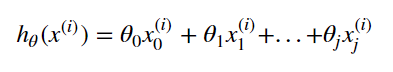![](/content/hypothesis.png)

In [19]:
data.shape

(506, 14)

In [20]:
weights = np.ones(shape=(X.shape[1], 1))

weights.shape

(13, 1)

In [21]:
# Using the hypothesis with a for loop

all_predictions = []
for data_point in X:
    hypothesis = 0
    for theta, x in zip(weights, data_point):
        hypothesis += theta*x

    all_predictions.append(hypothesis)

all_predictions[0:10]

[array([810.89932]),
 array([765.69441]),
 array([739.47839]),
 array([702.80057]),
 array([716.04625]),
 array([716.89005]),
 array([838.38479]),
 array([876.51105]),
 array([880.57834]),
 array([854.57014])]

In [22]:
# Using the hypothesis with vectorized operations

all_predictions = X @ weights

all_predictions[0:10]

array([[810.89932],
       [765.69441],
       [739.47839],
       [702.80057],
       [716.04625],
       [716.89005],
       [838.38479],
       [876.51105],
       [880.57834],
       [854.57014]])

## Seeing how fit works

For mean squared error, the formula is:
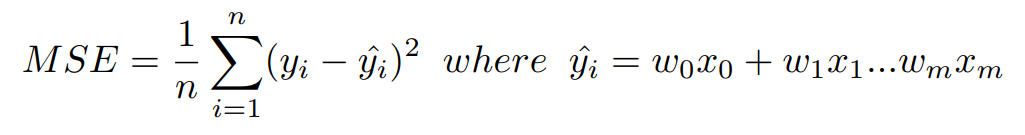

In [23]:
def sample_mse_function(Y, Y_pred):
    return np.mean((Y - Y_pred) ** 2)

In [24]:
Y = np.array([1, 0, 0, 1])
Y_Pred = np.array([1, 0, 0, 0])

error = sample_mse_function(Y, Y_Pred)
error

0.25

MSE Derivative:
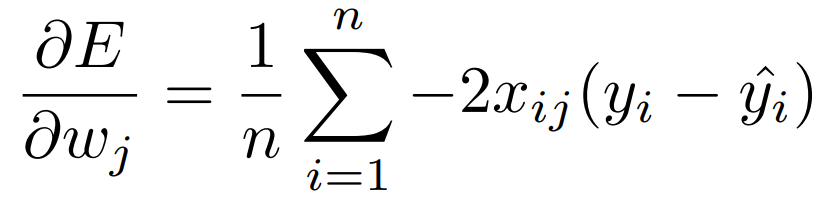

In [25]:
X = np.array([[2, 3, 4], [1, 2, 3], [5, 6, 7], [10, 11, 12]])

X.shape

(4, 3)

In [26]:
weights = np.ones(shape=(X.shape[1], 1))

weights

array([[1.],
       [1.],
       [1.]])

In [27]:
Y_pred = X@weights

Y_pred

array([[ 9.],
       [ 6.],
       [18.],
       [33.]])

In [28]:
Y_true = np.array([[8], [7], [19], [32]])

Y_true.shape

(4, 1)

In [29]:
sample_mse_function(Y_true, Y_pred)

1.0

In [30]:
difference = Y_true - Y_pred

difference

array([[-1.],
       [ 1.],
       [ 1.],
       [-1.]])

In [31]:
X

array([[ 2,  3,  4],
       [ 1,  2,  3],
       [ 5,  6,  7],
       [10, 11, 12]])

In [32]:
X.T

array([[ 2,  1,  5, 10],
       [ 3,  2,  6, 11],
       [ 4,  3,  7, 12]])

In [33]:
partial_derivative = -X.T @ difference
partial_derivative

array([[6.],
       [6.],
       [6.]])

In [34]:
learning_rate = 0.001
weights -= learning_rate*partial_derivative

weights

array([[0.994],
       [0.994],
       [0.994]])

In [35]:
sample_mse_function(Y_true, X@weights)

0.9597700000000007

# Mean Absolute Error:
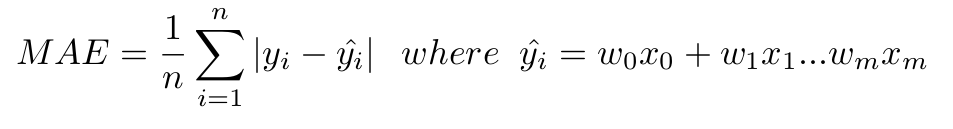
Derivative:
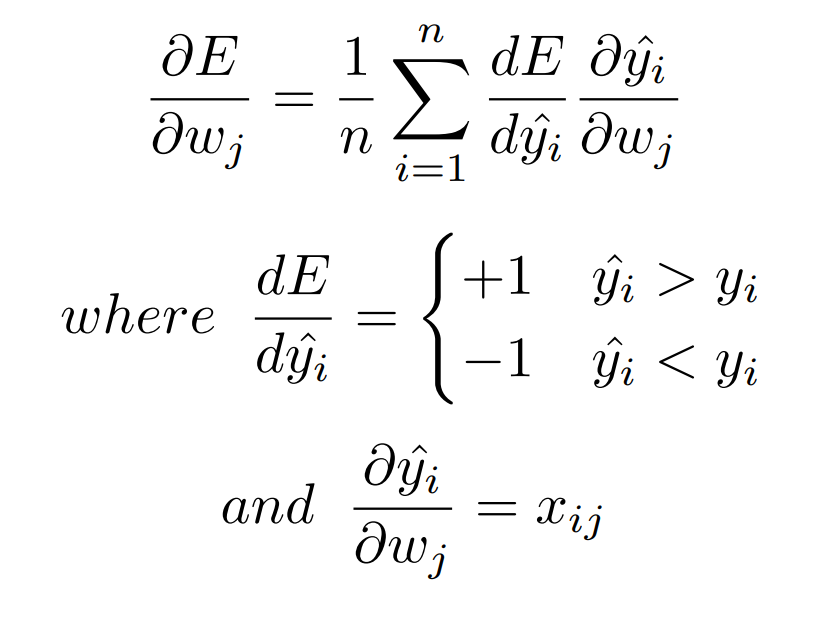

In [36]:
def sample_mean_absolute_error(Y, Y_pred):
    return np.mean(np.absolute(Y - Y_pred))

In [37]:
a = np.array([1, 2, 3, 4, 5])

# First parameter is the condition
# Second parameter is the value if true
# Third parameter is the value if false

np.where(a < 3, 0, a)

array([0, 0, 3, 4, 5])

In [38]:
def sample_mae_derivative(X, Y, Y_pred):
    # Get the difference
    difference = Y_pred - Y

    # If difference is 0, then substitute the values with 0, otherwise keep the same value
    abs_derivative = np.where(difference == 0, 0, difference)

    # If the difference is positive, that means Y_pred > Y
    abs_derivative = np.where(abs_derivative > 0, 1, abs_derivative)

    # If the difference is negative, that means Y_pred < Y
    abs_derivative = np.where(abs_derivative < 0, -1, abs_derivative)
    return X.T @ abs_derivative

In [39]:
X = np.array([[2, 3, 4], [1, 2, 3], [5, 6, 7], [10, 11, 12]])
weights = np.ones(shape=(X.shape[1], 1))
Y_pred = X@weights
Y_true = np.array([[7], [6], [20], [30]])

display(Y_pred)
display(Y_true)

array([[ 9.],
       [ 6.],
       [18.],
       [33.]])

array([[ 7],
       [ 6],
       [20],
       [30]])

In [40]:
sample_mean_absolute_error(Y_true, Y_pred)

1.75

In [41]:
partial_derivative = sample_mae_derivative(X, Y_true, Y_pred)

partial_derivative

array([[7.],
       [8.],
       [9.]])

In [42]:
weights -= 0.001 * partial_derivative
Y_pred = X@weights
sample_mean_absolute_error(Y_true, Y_pred)

1.7140000000000006

# Putting everything together

In [44]:
class LinearRegression():
    def __init__(self,
                 loss_function= 'mse', max_iter=1000, learning_rate = 0.001,
                fit_intercept=True, tolerance=0.001):
        # Before we know the shape of the data, we cannot initialize weights
        self._weights = None
        self._max_iter = max_iter
        self._learning_rate = learning_rate
        self._fit_intercept = fit_intercept
        self._tolerance = tolerance
        self._loss_function = loss_function
        self._loss_dict = {
            'mse': self.mean_squared_loss,
            'abs': self.mean_absolute_loss,
        }
        self._derivative_dict = {
            'mse': self.mean_squared_loss_derivative,
            'abs': self.mean_absolute_loss_derivative,
        }
        self._loss_history = None
        self._weights_history = None

    # Trailing underscore indicates that a method is for internal use
    def _init_weights(self, num_features):
        # It is good practice to use a normal distribution with mean 0 for weight initialization
        # There are more complicated methods too! But this works
        self._weights = np.random.normal(size=(num_features,1))

    def fit(self, X, Y):
        assert len(X) == len(Y), "X and Y should be the same length"
        # If we want to add a "bias" term, or y_intercept
        if self._fit_intercept:
            X = np.concatenate((X, np.ones(shape=(len(X), 1))), axis=1)

        # Initialize the weights
        self._init_weights(X.shape[1])

        # Initialize two lists to store the history
        loss_history = []
        weights_history = []

        # Used for early stopping on model convergence
        previous_loss = np.inf
        converged = False
        for i in range(self._max_iter):
            # Get Prediction
            Y_pred = self.predict(X)

            # Calculate loss to monitor preformance
            loss = self._loss_dict[self._loss_function](Y, Y_pred)

            # Stop Gradient Descent if model has converged
            if np.abs(loss - previous_loss) < self._tolerance:
                converged = True
                break
            previous_loss = loss

            loss_history.append(loss)
            # Because a Numpy Array is an object that gets updated each time
            # We need to use .copy() to append it to get the weights
            weights_history.append(self._weights.reshape(-1).copy())

            # Calculate Partial Derivative
            partial_derivative = self._derivative_dict[self._loss_function](X, Y, Y_pred)

            # Update the weights
            self._weights -= self._learning_rate * partial_derivative

        if converged:
            print("Model Converged")
        else:
            print("Warning: Max iterations reached, model did not converge")

        self._loss_history = np.array(loss_history)
        self._weights_history = np.array(weights_history)

    def predict(self, X):
        Y_pred = X @ self._weights
        return Y_pred

    def get_coefficients(self):
        return self._weights

    def get_training_history(self):
        return self._loss_history, self._weights_history

    # MSE Losses
    @staticmethod
    def mean_squared_loss(Y, Y_pred):
        return np.mean((Y - Y_pred)**2)

    def mean_squared_loss_derivative(self, X, Y, Y_pred):
        return (-X.T @ (Y - Y_pred)) / len(X)

    # Absolute Losses
    @staticmethod
    def mean_absolute_loss(Y, Y_pred):
        return np.mean(np.absolute(Y-Y_pred))

    def mean_absolute_loss_derivative(self, X, Y, Y_pred):
        difference = Y_pred - Y
        # If difference is 0, then substitute the values with 0, otherwise keep the same value
        abs_derivative = np.where(difference == 0, 0, difference)
        # If the difference is positive, that means Y_pred > Y
        abs_derivative = np.where(abs_derivative > 0, 1, abs_derivative)
        # If the difference is negative, that means Y_pred < Y
        abs_derivative = np.where(abs_derivative < 0, -1, abs_derivative)
        return X.T @ abs_derivative

In [45]:
from sklearn.preprocessing import StandardScaler

In [47]:
Y = data[['PRICE']].to_numpy()
X = data[feature_names].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


In [48]:
Regressor = LinearRegression(loss_function='mse', learning_rate=0.01)

In [49]:
Regressor.fit(X, Y)

Model Converged


In [50]:
loss_history, weights_history = Regressor.get_training_history()
print(loss_history.shape)
print(weights_history.shape)

(745,)
(745, 14)


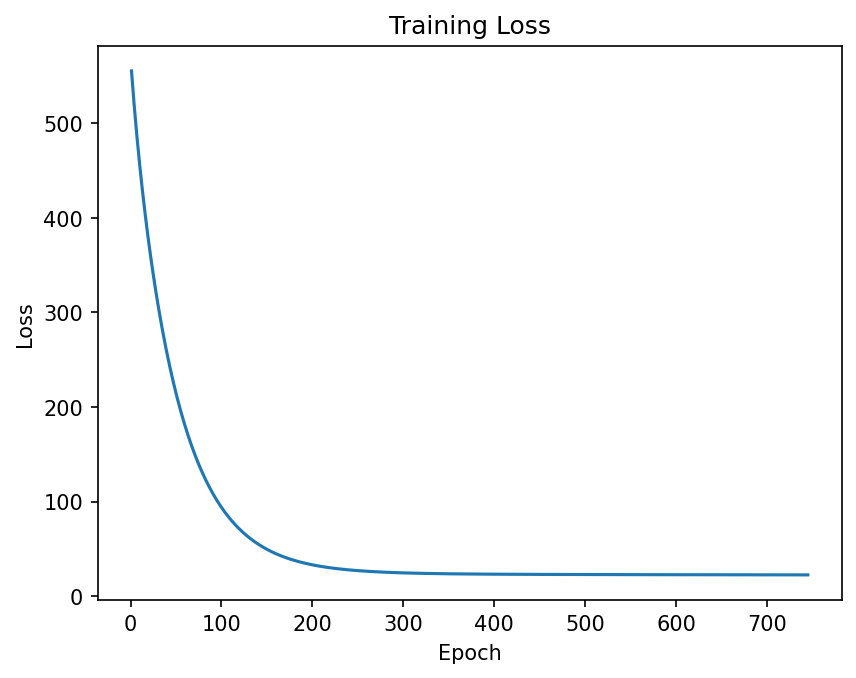

In [51]:
plt.figure(dpi=150)
iterations = range(1, len(loss_history) + 1)
plt.title("Training Loss")
plt.plot(iterations, loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

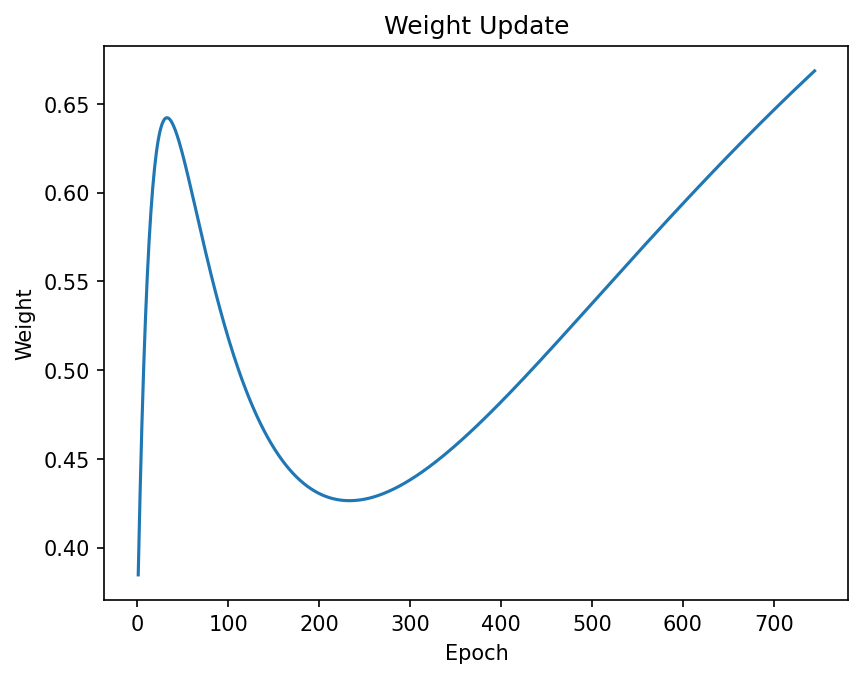

In [53]:
plt.figure(dpi=150)
plt.title("Weight Update")
plt.plot(iterations, weights_history[:, 1])
plt.xlabel("Epoch")
plt.ylabel("Weight")
plt.show()